# Loss functions

Some personal notes on loss functions and parameter initialization to develop my intuition. I will be adding more content to this as I go along.

<img src='images/stepwell.jpg' width='500' height='300'>

Image: ancient stepwell of Chand Baori

### Error vs. loss 

- the error captures the deviation of the prediction vs. the truth label **for one sample*** 
- the loss is a weighted sum (normally the average) of all errors of a sample 

### Why do we need error and loss functions  

- to judge model performance (i.e., give us an idea how well the model prediction is performing against the truth label) 
- to motivate learning (the shape of the loss function determines the parameter gradients and thus the speed and direction of learning)  

### Properties a loss function should have:

1. Be continuous and have a meaningful derivative across the prediction range (to allow for gradient descent)
2. Account for both positive and negative deviations from the truth label (and prevent them from cancelling each other out) 
3. Put more weight on errors caused by predictions further from the truth label than errors close to the truth (ideally in a non-linear, escalating fashion, such that very bad predictions get "punished" very heavily, i.e., increase the error term drastically) 

*The error term can be a function of more than just the prediction and truth label. In the case of L2 Normalization, it also increases with the sum of all parameters W of the neural net to "incentivize" the model towards overall smaller absolute parameter values. This is important for activation functions such as sigmoid, tanh or Swish wich are most "expressive" (i.e., slope very different from zero) at values around 0  

Sources: 
- https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0
- https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0
- https://deepnotes.io/softmax-crossentropy
- deeplearning.ai specialization on coursera


In [2]:
# import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Mean absolute error (MAE)

The mean absolute error simply sums the absolute differences between all predictions (y_hat) and truth values (y)

<img src='images/MAE.png.' width='300' height='300'>

### Properties 
- Derivative == 1 
- Positive and negative errors do not cancel each other out
- Error term increases proportionally with distance to truth label (see MAE errors chart below)

### Implications 
- **Easy to interpret:** the MAE can be useful for intepreting the error (e.g., if we want to predict USD house prices, the error simply states by how many USD the model was wrong) 
- **More suited for regressions rather than classification:** in classifications, small absolute differences in the prediction values can change the predicted class and thus require error to increase more rapidly with distance to the truth value
- **Risk of non-diverging:** since the derivative at any point is 1, the speed of convergence towards the global minimum of the cost function stays constant and learning algorithm can overshoot rather than settle around the minimum 

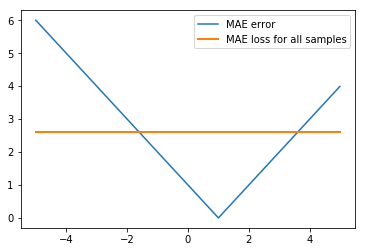

In [228]:
# define error function
def MAE(prediction, label):
    return abs(prediction - label)

# define loss function (assumes samples are stacked vertically)
def MAE_loss(prediction, label):
    return np.sum(MAE(prediction, label), axis=0)/len(prediction)
            
# create synthetic data ranging from [-5:5] 
predictions = np.arange(-5, 5, 0.01)
avg_predictions = np.average(predictions)

# set truth label to 1 for all samples
labels = np.ones((predictions.shape))
errors = MAE(predictions, labels)
loss = MAE_loss(predictions, labels)

# plot dataset
sns.lineplot(x=predictions, y=errors, label='MAE error')
plt.plot([-5, 5], [loss,loss], linewidth=2, label='MAE loss for all samples')
plt.legend()

The above plot shows the MAE for values ranging between +/-5 when the truth label is 1. We can observe that the error increases in a linear fashion away from the truth value. The MAE loss is simply the average of all errors across this range (orange line)

## Mean squared error (MSE) 

The MSE simply squares the difference between prediction (y_hat) and truth value (y) before summing and computing the average

<img src='images/MSE.png.' width='300' height='300'>

### Properties

- Meaningful derivative over its entire range 
- Positive and negative errors do not cancel each other out 
- Error term increases quadratically with distance to truth label (see MSE errors chart below)

### Implications

- **Hard to interpret:** the squared difference in house prices is harder to intuitively understand than the actual difference 
- **Better learning motivator than MAE:** the error term increases quadratically with the difference to the truth label, i.e., doubling the distance away from the truth value quadruples the loss


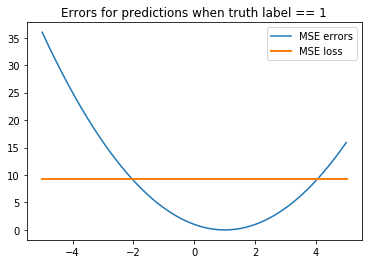

In [4]:
# define error function
def MSE(prediction, label):
    return np.square(prediction - label)

# define loss function 
def MSE_loss(prediction, label): 
    return np.sum(np.square(prediction - label), axis=0) / len(prediction)
            
# create synthetic data ranging from [-5:5] 
predictions = np.arange(-5, 5, 0.01)
avg_predictions = np.average(predictions)

# create truth label (assuming 1 for all samples)
labels = np.ones((predictions.shape))
errors = MSE(predictions, labels)
loss = MSE_loss(predictions, labels)

# plot dataset
sns.lineplot(x=predictions, y=errors, label = "MSE errors").set_title('Errors for predictions when truth label == 1')
plt.plot([-5, 5], [loss,loss], linewidth=2, label='MSE loss')
plt.legend()


The above plot shows the MSE for values ranging between +/-5 when the truth label is 1. We can observe that the error increases in a quadratic fashion away from the truth value. The MSE loss is simply the average of all errors across this range (orange line). Compared to MAE where the loss was equal to c. 2.5 across a prediction range of +/-5, the MSE loss is just under 10 for that same range. This is because the MSE increases faster as we move away from the truth (1 in this case)

## Root Mean Squared Error (RMSE) 

The RMSE simply applies a square root to the average quadratic error

<img src='images/RMSE.png.' width='300' height='300'>

### Properties 

- Meaningful derivative across its entire range 
- Positive and negative errors do not cancel each other out 
- Error term increases quadratically with distance to truth label (see MSE errors chart below) 

### Implication 

- **Better learning motivator than MAE:** converges in a more stable way towards the minimum of the loss function as the gradients become smaller the closer the predictions get to the truth value. 
- **Works well for logistic regression (i.e., continuous output labels), but not so well for classification:** RMSE provides a meaningful derivative, and "incentivizes" learning through a non-linear increase in the error. However, it is not great for category predictions (loss rises too slowly for bad predictions , i.e., predicting 1 when true label is zero will give loss of 1, whereas predicting 0.5 gives half that loss)

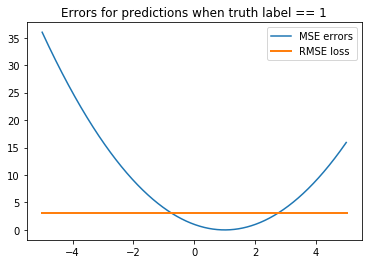

In [5]:
# define loss function
def RMSE(prediction, label):
    n = len(prediction)
    return np.sqrt(MSE_loss(prediction, label))


# create synthetic data ranging from [-5:5] 
predictions = np.arange(-5, 5, 0.01)
avg_predictions = np.average(predictions)

# create truth label (assuming 1 for all samples)
labels = np.ones((predictions.shape))
errors = MSE(predictions, labels)
loss = RMSE(predictions, labels)

# plot dataset
sns.lineplot(x=predictions, y=errors, label = "MSE errors").set_title('Errors for predictions when truth label == 1')
plt.plot([-5, 5], [loss,loss], linewidth=2, label='RMSE loss')
plt.legend()


In the above plot we can see that only the orange line (loss) has changed relative to the previous chart. Rather than just summing over all quadratic errors, the RMSE applies a square root and thus brings the loss value back to a meaningful range 

## RMSE vs. MAE loss

Since RMSE squares the difference between predictions and truth labels (before taking the square root of the average), **outliers have a larger impact on the overall loss of a given batch**. In other words, **a very bad prediction pushes the RMSE loss further up** than the MAE loss. 

To illustrate this, the **below plot compares RMSE and MAE plots for 1000 different batches** where each batch consists of 1000 randomly generated samples/observations. Crucically, each sample has a mean of 0 and a standard deviation ranging from 0 to 100 (plotted on the x-axis). In other words, there are batches with a very small standard deviation (e.g., 0, 0.1, etc.,) and there are batches with a very large standard deviation (e.g., 99, 100). The y-axis plots the respective loss for each of those different batches assuming all truth labels to be 1. We can clearly see how the RMSE distribution of losses is higher than that of the MAE losses. 

### Implications

- **MAE can be useful where label outliers are just statistical noise:** using RMSE, the model would "try" to reduce these outliers rather than improving on the majority of non-outlier labels. **Choosing RMSE over MAE loss depends on whether we strongly care about predicting outliers correctly or not, RMSE is more likely to predict outliers while MAE is more likely to predict median values**


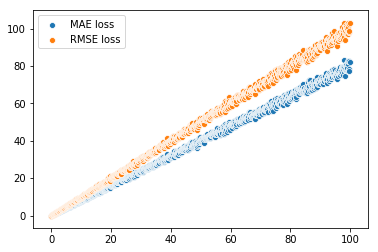

In [231]:
# stack distributions 
samples_per_batch = 1000
batches = 1000
max_stdev = 100

# create range of standard deviations 
stdev_range = np.arange(0, max_stdev, max_stdev/batches)

# create and stack distributions - shape(batches, samples per batch)
array = np.empty((samples_per_batch,1))
for i in stdev_range: 
    x = np.random.normal(1,i,(samples_per_batch, 1))
    array = np.append(arr= array, values=x, axis=1)
# take empty part out
array = array[:,1:len(stdev_range)+1]


labels = np.ones((array.shape))

MAE_l = MAE_loss(array, labels)
MSE_l = MSE_loss(array, labels)
RMSE_l = RMSE(array, labels)


sns.scatterplot(x=stdev_range, y=MAE_l, label = "MAE loss")
#sns.scatterplot(x=stdev_range, y=MSE_l, label = "MSE loss")
sns.scatterplot(x=stdev_range, y=RMSE_l, label = "RMSE loss")
plt.legend()



The above chart plots the standard deviation of a batch on the x-axis and the associated loss on the y-axis. We can see how RMSE loss increases faster for sample distributions with higher standard deviations (i.e., more extreme outliers)

## Logistic loss / cross entropy loss

The log loss function multiplies the categorical truth label (y) with log of the prediction (p) and then adds the product of (1-y) and log(1-p). Thus, if y=0, only the second term remains and the error becomes 1 * log(1-p), and if y=1 only the first term remains as 1 * log(p):

<img src='images/logistic_loss.JPG.' width='400' height='400'>

This function can be used both for binary classification (where the prediction comes from a Sigmoid activation function) or multi-class classification (where the predictions for each class comes from a Softmax activation function). In the latter case, the log loss can be applied to each class in turn calculating the error given the label for that class (0 or 1) and the likelihood prediction for that class (a number between 0-1). Summing over all those indiviudal errors gives us the loss for that sample.

### Implication

- **Useful to motivate classification:** as the prediction moves towards the opposite of the label (i.e., y=1 and p->0), the error goes towards infinity (see chart below for binary error)



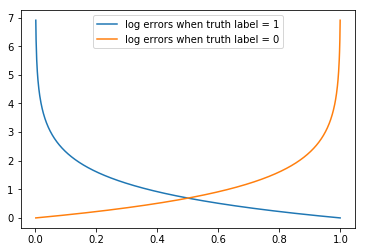

In [13]:
# define error function
def cross_entropy(prediction, label):
    return - (label*np.log(prediction)) + ((1-label) * np.log(1-prediction))

# define loss function 
def cross_entropy_loss(prediction, label):
    n = prediction.shape[0]
    return np.sum(cross_entropy(prediction, label))/n

# create synthetic data ranging from [0:1] 
predictions = np.arange(0.001, 0.9999999, 0.001)
avg_predictions = np.average(predictions)

# create truth label (assuming 1 for all samples)
labels_one = np.ones((predictions.shape))
labels_zero = np.zeros((predictions.shape))
errors_one = cross_entropy(predictions, labels_one)
errors_zero = -cross_entropy(predictions, labels_zero)


# plot dataset
sns.lineplot(x=predictions, y=errors_one, label = "log errors when truth label = 1")
sns.lineplot(x=predictions, y=errors_zero, label = "log errors when truth label = 0")
plt.legend()

In the above plot we can see how the error term explodes as the prediction moves close to the opposite of the truth label